In [1]:
# Importando bibliotecas
import tensorflow as tf
import pandas as pd
import math
import datetime
from scipy import stats
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow import keras
from tensorflow.python.keras import models
from tensorflow.python.keras import layers
from tensorflow.python.keras import backend as Kb
from tensorflow.python.data import Dataset
# Helper Libraries
import numpy as np
import matplotlib.pyplot as plt
import sys
import statsmodels as sm
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import pkg_resources

import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt
import csv
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, mean_absolute_error,  r2_score

In [2]:
# Diretório com os 4 dataset do INMET agrupados em um unico dataset
diretorio = './Dados/INMET/Unificados/dataset_INMET-Salvador.csv'
diretorio_api = './Dados/API/dados_api_ate_2022.csv'

In [3]:
# Lista de bibliotecas que você quer obter as versões
bibliotecas = ['numpy', 'pandas', 'matplotlib', 'seaborn', 'scikit-learn','pkg_resources',
               'tensorflow','sympy','python-dateutil','stats','sklearn','sys','statsmodels','os',
               'csv','imblearn']

# Dicionário para armazenar as versões
versoes = {}

for biblioteca in bibliotecas:
    try:
        versao = pkg_resources.get_distribution(biblioteca).version
        versoes[biblioteca] = versao
    except pkg_resources.DistributionNotFound:
        versoes[biblioteca] = 'Não encontrada'

# Exibir as versões
for biblioteca, versao in versoes.items():
    print(f'{biblioteca}: {versao}')

numpy: 1.21.5
pandas: 1.5.3
matplotlib: 3.8.0
seaborn: 0.12.2
scikit-learn: 1.3.0
pkg_resources: Não encontrada
tensorflow: 2.10.0
sympy: 1.12
python-dateutil: 2.8.2
stats: Não encontrada
sklearn: Não encontrada
sys: Não encontrada
statsmodels: 0.14.0
os: Não encontrada
csv: Não encontrada
imblearn: 0.0


In [4]:
# Leitura do dataset
dados = pd.read_csv(diretorio) 
dados_api = pd.read_csv(diretorio_api)


In [5]:
# Substituição de  registros NaN por 0
dados = dados.fillna(0)  
dados =dados.sample(1461)
dados_api = dados_api.fillna(0) 


In [6]:
#Transforma o tipo do campo data
dados['DATA (YYYY-MM-DD)'] = pd.to_datetime(dados['DATA (YYYY-MM-DD)'])
# Substituir 'A401' por 'Salvador' na coluna 'ESTACAO'
dados['ESTACAO'] = dados['ESTACAO'].replace({'A401': 'Salvador'})


## Previsão com dados do INMET

In [7]:
# Selecionar características relevantes
features = dados[[ 'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)', 'UMIDADE RELATIVA DO AR, HORARIA (%)', 'VENTO, VELOCIDADE HORARIA (m/s)']]
#Define a variavel a ser prevista
targets = dados['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)']

In [8]:
 # Dividir em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.4, random_state=42)


In [9]:
# Normalização dos dados 

scaler = MinMaxScaler() 

train_normalized = (X_train - X_train.mean())/X_train.std()
test_normalized = (X_test - X_test.mean())/X_test.std()

# Removendo a primeira linha a cada 1 hora (resultados)
train_result = train_normalized

# Removendo a última linha (não há resultados para a última linha)
train_normalized = train_normalized

# Removendo a primeira linha a cada 1 hora (resultados)
test_result = test_normalized

# Removendo a última linha (não há resultados para a última linha)
test_normalized = test_normalized

# Verificar os dados normalizados
print("Dados de treino normalizados:")
print(train_normalized[:-1])
print("\nDados de teste normalizados:")
print(test_normalized[:-1])



Dados de treino normalizados:
      TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)  \
162                                       1.393885   
7822                                     -0.221192   
4505                                      0.317167   
4352                                     -1.163321   
3555                                     -0.849278   
...                                            ...   
7836                                      1.169569   
7426                                      0.451757   
1429                                      1.977108   
4877                                     -1.297911   
2403                                     -0.086602   

      UMIDADE RELATIVA DO AR, HORARIA (%)  VENTO, VELOCIDADE HORARIA (m/s)  
162                             -1.159233                         0.405484  
7822                             0.135524                        -0.250479  
4505                            -1.258830                        -0.578461  
4352         

In [10]:
df_test = pd.DataFrame(test_normalized)
print(df_test)

      TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)  \
582                                      -0.390540   
1314                                      2.156353   
4844                                     -0.343375   
3749                                     -0.626363   
2965                                      0.882907   
...                                            ...   
1512                                      0.128272   
1237                                      1.684706   
2421                                      0.175437   
4931                                     -0.673528   
6826                                     -0.390540   

      UMIDADE RELATIVA DO AR, HORARIA (%)  VENTO, VELOCIDADE HORARIA (m/s)  
582                              0.734339                        -0.408957  
1314                            -1.686767                        -0.231611  
4844                            -0.423581                        -0.231611  
3749                            -0.107785  

In [11]:
df_train = pd.DataFrame(train_normalized)
print(df_train)

      TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)  \
162                                       1.393885   
7822                                     -0.221192   
4505                                      0.317167   
4352                                     -1.163321   
3555                                     -0.849278   
...                                            ...   
7426                                      0.451757   
1429                                      1.977108   
4877                                     -1.297911   
2403                                     -0.086602   
2228                                      0.765799   

      UMIDADE RELATIVA DO AR, HORARIA (%)  VENTO, VELOCIDADE HORARIA (m/s)  
162                             -1.159233                         0.405484  
7822                             0.135524                        -0.250479  
4505                            -1.258830                        -0.578461  
4352                             0.035928  

In [12]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [14]:
y_pred = modelo.predict(X_test)

#
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean squared error:', mse)
print('Mean absolute error:', mae)
print('R-squared:', r2)

Mean squared error: 0.7813943273685928
Mean absolute error: 0.3529619602455774
R-squared: 0.0941128333543475


In [15]:
#Função que realiza calculo da metrica MAE
def root_mean_squared_error(x, y):
        return Kb.sqrt(Kb.mean(Kb.square(x - y), axis=-1))

In [16]:
#Treinando Epoch
regularizer=tf.compat.v1.keras.regularizers.l2(0.001)
model = keras.Sequential([
layers.Dense(20, activation='relu', input_shape = (8,), kernel_regularizer=regularizer),
layers.Dense(12, activation='relu', kernel_regularizer=regularizer),
layers.Dense(4, activation='relu', kernel_regularizer=regularizer),
layers.Dense(1)
])

model.compile(loss='mean_squared_error', optimizer='adam',#Utilizando metrica MAE e MSE
              metrics=['mean_absolute_error', 'mean_squared_error', root_mean_squared_error])

model.fit(train_normalized, train_result,
  epochs=100, batch_size=1,validation_split = 0.0, verbose=1)


Epoch 1/100
876/876 [==============================] - 4s 2ms/step - loss: 0.9616 - mean_absolute_error: 0.7572 - mean_squared_error: 0.9616 - root_mean_squared_error: 0.8513
Epoch 2/100
876/876 [==============================] - 1s 2ms/step - loss: 0.8638 - mean_absolute_error: 0.7275 - mean_squared_error: 0.8638 - root_mean_squared_error: 0.8105
Epoch 3/100
876/876 [==============================] - 1s 2ms/step - loss: 0.8608 - mean_absolute_error: 0.7255 - mean_squared_error: 0.8608 - root_mean_squared_error: 0.8090
Epoch 4/100
876/876 [==============================] - 1s 2ms/step - loss: 0.8604 - mean_absolute_error: 0.7258 - mean_squared_error: 0.8604 - root_mean_squared_error: 0.8088
Epoch 5/100
876/876 [==============================] - 1s 2ms/step - loss: 0.8602 - mean_absolute_error: 0.7258 - mean_squared_error: 0.8602 - root_mean_squared_error: 0.8086
Epoch 6/100
876/876 [==============================] - 1s 2ms/step - loss: 0.8602 - mean_absolute_error: 0.7261 - mean_square

876/876 [==============================] - 1s 1ms/step - loss: 0.8598 - mean_absolute_error: 0.7261 - mean_squared_error: 0.8598 - root_mean_squared_error: 0.8083
Epoch 94/100
876/876 [==============================] - 1s 1ms/step - loss: 0.8597 - mean_absolute_error: 0.7259 - mean_squared_error: 0.8597 - root_mean_squared_error: 0.8083
Epoch 95/100
876/876 [==============================] - 1s 2ms/step - loss: 0.8597 - mean_absolute_error: 0.7259 - mean_squared_error: 0.8597 - root_mean_squared_error: 0.8083
Epoch 96/100
876/876 [==============================] - 1s 2ms/step - loss: 0.8597 - mean_absolute_error: 0.7259 - mean_squared_error: 0.8597 - root_mean_squared_error: 0.8083
Epoch 97/100
876/876 [==============================] - 1s 2ms/step - loss: 0.8597 - mean_absolute_error: 0.7261 - mean_squared_error: 0.8597 - root_mean_squared_error: 0.8083
Epoch 98/100
876/876 [==============================] - 1s 2ms/step - loss: 0.8597 - mean_absolute_error: 0.7260 - mean_squared_error

19/19 [==============================] - 0s 3ms/step
Mean Squared Error: 25.688933529551132
Mean Absolute Error: 4.943961664998634
R-squared: -28.781730419775933


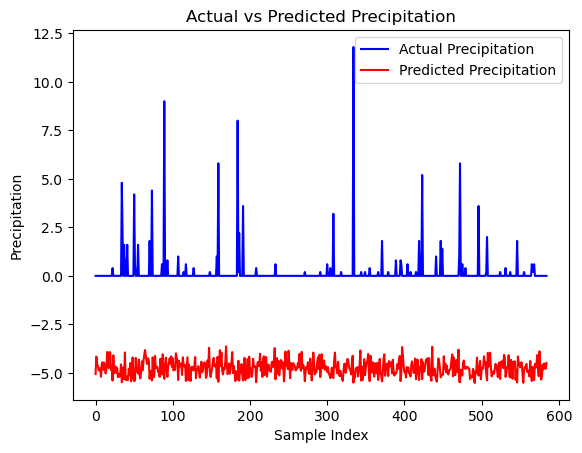

19/19 [==============================] - 0s 2ms/step
         Pred  Real
0   -5.063280   0.0
1   -4.163875   0.0
2   -4.532496   0.0
3   -4.644616   0.0
4   -4.875716   0.0
..        ...   ...
580 -4.820521   0.0
581 -4.514249   0.0
582 -4.677731   0.0
583 -4.790042   0.0
584 -4.486557   0.0

[585 rows x 2 columns]


In [17]:
# Treinando o modelo
model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliando o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('R-squared:', r2)

# Visualizando as previsões em relação aos valores reais
plt.plot(y_test.values, label='Actual Precipitation', color='blue')
plt.plot(y_pred, label='Predicted Precipitation', color='red')
plt.xlabel('Sample Index')
plt.ylabel('Precipitation')
plt.title('Actual vs Predicted Precipitation')
plt.legend()
plt.show()

# Realizando previsões utilizando sklearn
predictions = model.predict(X_test)
df1 = pd.DataFrame({"Pred": predictions.flatten(), "Real": y_test.values.flatten()})

# Visualizando as previsões em um DataFrame
print(df1)


NameError: name 'X_test' is not defined

In [18]:
# Realizando previsões utilizando sklearn
predictions = model.predict(X_test)
df1 = pd.DataFrame(df1)

# Visualizando as previsões em um DataFrame
print(df1)

19/19 [==============================] - 0s 824us/step
         Pred  Real
0   -5.063280   0.0
1   -4.163875   0.0
2   -4.532496   0.0
3   -4.644616   0.0
4   -4.875716   0.0
..        ...   ...
580 -4.820521   0.0
581 -4.514249   0.0
582 -4.677731   0.0
583 -4.790042   0.0
584 -4.486557   0.0

[585 rows x 2 columns]


## Previsão com dados do INMET e Open Meteo


In [19]:
# Selecionar características relevantes
features = dados_api[[ 'temperature_2m_mean', 'relative_humidity_2m_max', 'wind_speed_10m_mean']]
#Define a variavel a ser prevista
targets = dados['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)']
features

,temperature_2m_mean,relative_humidity_2m_max,wind_speed_10m_mean
0,26.815092,26.815092,91.317510
1,28.864230,28.864230,92.345540
2,27.511778,27.511778,91.363510
3,28.759325,28.759325,92.381480
4,29.206875,29.206875,92.399445
...,...,...,...
1456,27.895555,27.895555,79.026480
1457,28.699463,28.699463,74.084690
1458,26.503368,26.503368,75.142900
1459,28.057278,28.057278,81.201096


In [21]:
 # Dividir em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.4, random_state=42) 


In [22]:
# Normalização dos dados 

scaler = MinMaxScaler() 

train_normalized = (X_train - X_train.mean())/X_train.std()
test_normalized = (X_test - X_test.mean())/X_test.std()

# Removendo a primeira linha a cada 1 hora (resultados)
train_result = train_normalized

# Removendo a última linha (não há resultados para a última linha)
train_normalized = train_normalized

# Removendo a primeira linha a cada 1 hora (resultados)
test_result = test_normalized

# Removendo a última linha (não há resultados para a última linha)
test_normalized = test_normalized

# Verificar os dados normalizados
print("Dados de treino normalizados:")
print(train_normalized[:-1])
print("\nDados de teste normalizados:")
print(test_normalized[:-1])



Dados de treino normalizados:
      temperature_2m_mean  relative_humidity_2m_max  wind_speed_10m_mean
442              1.450306                  1.450306            -0.458176
319              1.090674                  1.090674             0.449086
767              1.060032                  1.060032             0.908982
756              0.967334                  0.967334             0.881916
424              1.084383                  1.084383            -0.816760
...                   ...                       ...                  ...
1095             1.185906                  1.185906            -0.694750
1130             0.714767                  0.714767             0.903447
1294            -1.040778                 -1.040778             0.380859
860              0.002324                  0.002324            -1.972843
1459             0.218989                  0.218989            -0.704716

[875 rows x 3 columns]

Dados de teste normalizados:
      temperature_2m_mean  relative_humi

In [23]:
df_test = pd.DataFrame(test_normalized)
print(df_test)

      temperature_2m_mean  relative_humidity_2m_max  wind_speed_10m_mean
892             -0.408365                 -0.408365             0.758004
1105             0.037470                  0.037470            -0.543967
413              1.596699                  1.596699            -5.041975
522             -0.365846                 -0.365846             0.821994
1036             1.211127                  1.211127             0.339516
...                   ...                       ...                  ...
1103             0.993859                  0.993859             0.147137
752             -0.002711                 -0.002711             0.878884
1353             0.873690                  0.873690             0.160725
376              2.169409                  2.169409             0.851998
314             -0.052472                 -0.052472             0.269176

[585 rows x 3 columns]


In [24]:
df_train = pd.DataFrame(train_normalized)
# Remove the comment below to see the table
print(df_train)

      temperature_2m_mean  relative_humidity_2m_max  wind_speed_10m_mean
442              1.450306                  1.450306            -0.458176
319              1.090674                  1.090674             0.449086
767              1.060032                  1.060032             0.908982
756              0.967334                  0.967334             0.881916
424              1.084383                  1.084383            -0.816760
...                   ...                       ...                  ...
1130             0.714767                  0.714767             0.903447
1294            -1.040778                 -1.040778             0.380859
860              0.002324                  0.002324            -1.972843
1459             0.218989                  0.218989            -0.704716
1126             0.425374                  0.425374             0.893604

[876 rows x 3 columns]


In [25]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [26]:
y_pred = modelo.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean squared error:', mse)
print('Mean absolute error:', mae)
print('R-squared:', r2)

Mean squared error: 0.8618109450142968
Mean absolute error: 0.33090119752214964
R-squared: 0.0008841274900289742


In [27]:
#Função que realiza calculo da metrica MAE
def root_mean_squared_error(x, y):
        return Kb.sqrt(Kb.mean(Kb.square(x - y), axis=-1))

In [34]:
#Treinando Epoch
regularizer=tf.compat.v1.keras.regularizers.l2(0.001)
model = keras.Sequential([
layers.Dense(20, activation='ELU', input_shape = (8,), kernel_regularizer=regularizer),
layers.Dense(12, activation='ELU', kernel_regularizer=regularizer),
layers.Dense(4, activation='ELU', kernel_regularizer=regularizer),
layers.Dense(1)
])

model.compile(loss='mean_squared_error', optimizer='adam',#Utilizando metrica MAE e MSE
              metrics=['mean_absolute_error', 'mean_squared_error', root_mean_squared_error])

model.fit(train_normalized, train_result,
  epochs=100, batch_size=1,validation_split = 0.0, verbose=1)


Epoch 1/100
876/876 [==============================] - 2s 2ms/step - loss: 0.5248 - mean_absolute_error: 0.5342 - mean_squared_error: 0.5248 - root_mean_squared_error: 0.5781
Epoch 2/100
876/876 [==============================] - 1s 2ms/step - loss: 0.4522 - mean_absolute_error: 0.4945 - mean_squared_error: 0.4522 - root_mean_squared_error: 0.5315
Epoch 3/100
876/876 [==============================] - 1s 2ms/step - loss: 0.4494 - mean_absolute_error: 0.4931 - mean_squared_error: 0.4494 - root_mean_squared_error: 0.5268
Epoch 4/100
876/876 [==============================] - 1s 2ms/step - loss: 0.4483 - mean_absolute_error: 0.4925 - mean_squared_error: 0.4483 - root_mean_squared_error: 0.5245
Epoch 5/100
876/876 [==============================] - 1s 2ms/step - loss: 0.4478 - mean_absolute_error: 0.4927 - mean_squared_error: 0.4478 - root_mean_squared_error: 0.5239
Epoch 6/100
876/876 [==============================] - 1s 1ms/step - loss: 0.4480 - mean_absolute_error: 0.4930 - mean_square

876/876 [==============================] - 1s 2ms/step - loss: 0.4472 - mean_absolute_error: 0.4931 - mean_squared_error: 0.4472 - root_mean_squared_error: 0.5231
Epoch 94/100
876/876 [==============================] - 1s 2ms/step - loss: 0.4473 - mean_absolute_error: 0.4930 - mean_squared_error: 0.4473 - root_mean_squared_error: 0.5232
Epoch 95/100
876/876 [==============================] - 1s 1ms/step - loss: 0.4472 - mean_absolute_error: 0.4930 - mean_squared_error: 0.4472 - root_mean_squared_error: 0.5230
Epoch 96/100
876/876 [==============================] - 1s 1ms/step - loss: 0.4472 - mean_absolute_error: 0.4931 - mean_squared_error: 0.4472 - root_mean_squared_error: 0.5231
Epoch 97/100
876/876 [==============================] - 1s 1ms/step - loss: 0.4472 - mean_absolute_error: 0.4930 - mean_squared_error: 0.4472 - root_mean_squared_error: 0.5230
Epoch 98/100
876/876 [==============================] - 1s 1ms/step - loss: 0.4473 - mean_absolute_error: 0.4931 - mean_squared_error

19/19 [==============================] - 0s 1ms/step
Mean Squared Error: 1.7802232226167238
Mean Absolute Error: 1.1697126230826747
R-squared: -1.0638508812367355


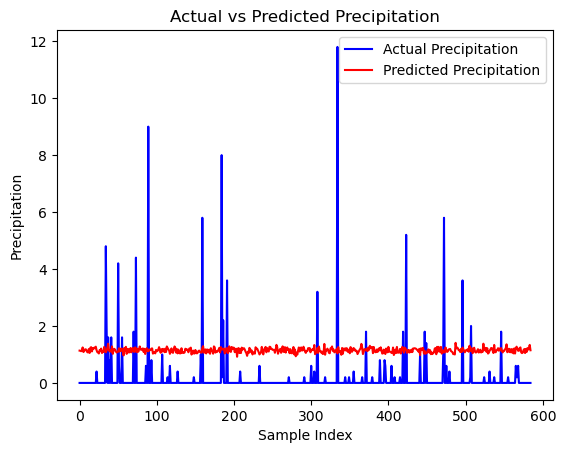

19/19 [==============================] - 0s 2ms/step
         Pred  Real
0    1.134331   0.0
1    1.129338   0.0
2    1.113550   0.0
3    1.139536   0.0
4    1.246323   0.0
..        ...   ...
580  1.223802   0.0
581  1.169197   0.0
582  1.214967   0.0
583  1.335481   0.0
584  1.146968   0.0

[585 rows x 2 columns]


In [35]:
# Treinando o modelo
model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliando o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('R-squared:', r2)

# Visualizando as previsões em relação aos valores reais
plt.plot(y_test.values, label='Actual Precipitation', color='blue')
plt.plot(y_pred, label='Predicted Precipitation', color='red')
plt.xlabel('Sample Index')
plt.ylabel('Precipitation')
plt.title('Actual vs Predicted Precipitation')
plt.legend()
plt.show()

# Realizando previsões utilizando sklearn
predictions = model.predict(X_test)
df1 = pd.DataFrame({"Pred": predictions.flatten(), "Real": y_test.values.flatten()})

# Visualizando as previsões em um DataFrame
print(df1)


In [36]:
# Realizando previsões utilizando sklearn
predictions = model.predict(X_test)
df1 = pd.DataFrame(df1)

# Visualizando as previsões em um DataFrame
print(df1)

19/19 [==============================] - 0s 2ms/step
         Pred  Real
0    1.134331   0.0
1    1.129338   0.0
2    1.113550   0.0
3    1.139536   0.0
4    1.246323   0.0
..        ...   ...
580  1.223802   0.0
581  1.169197   0.0
582  1.214967   0.0
583  1.335481   0.0
584  1.146968   0.0

[585 rows x 2 columns]
